In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("drive/MyDrive/data_sets/IMDB Dataset.csv")
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
#Create Imbanlanced Dataset
df_positive = data[data.sentiment =='positive'][:9000]
df_negative = data[data.sentiment == 'negative'][:1000]
df_imb = pd.concat([df_positive, df_negative])
print(df_imb.sentiment.value_counts())

positive    9000
negative    1000
Name: sentiment, dtype: int64


In [ ]:
#Resample Imbalanced Dataset
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
df_bal, df_bal['sentiment']= rus.fit_resample(df_imb[['review']], df_imb[['sentiment']])
print(df_bal)
print(df_bal.sentiment.value_counts())

                                                 review sentiment
0     Basically there's a family where a little boy ...  negative
1     This show was an amazing, fresh & innovative i...  negative
2     Encouraged by the positive comments about this...  negative
3     Phil the Alien is one of those quirky films wh...  negative
4     I saw this movie when I was about 12 when it c...  negative
...                                                 ...       ...
1995  Knute Rockne led an extraordinary life and his...  positive
1996  At the height of the 'Celebrity Big Brother' r...  positive
1997  This is another of Robert Altman's underrated ...  positive
1998  This movie won a special award at Cannes for i...  positive
1999  You'd be forgiven to think a Finnish director ...  positive

[2000 rows x 2 columns]
negative    1000
positive    1000
Name: sentiment, dtype: int64


In [ ]:
#Splitting Data into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_bal, test_size =0.33, random_state=42)
train_x, train_y=train['review'], train['sentiment']
test_x, test_y=test['review'],test['sentiment']

In [1]:
#Turning text into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
train_x_vector = tfidf.fit_transform(train_x)
#print(train_x_vector)
test_x_vector = tfidf.transform(test_x)

NameError: ignored

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(train_x_vector, train_y)
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform([' I did not like this movie'])))
print(svc.predict(tfidf.transform([' I did like this movie'])))
#Model Evaluation
svc.score(test_x_vector, test_y)

['positive']
['positive']
['negative']
['negative']


0.8409090909090909

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)
print(dec_tree.predict(tfidf.transform(['A good movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform([' I did not like this movie'])))
print(dec_tree.predict(tfidf.transform([' I did like this movie'])))

['positive']
['positive']
['positive']
['positive']


NameError: ignored

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)
print(gnb.predict((tfidf.transform(['A good movie'])).toarray()))
print(gnb.predict((tfidf.transform(['An excellent movie'])).toarray()))
print(gnb.predict((tfidf.transform(['I did not like this movie'])).toarray()))
print(gnb.predict((tfidf.transform(['I did like this movie'])).toarray()))

['negative']
['negative']
['negative']
['negative']


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(train_x_vector, train_y)
print(log_reg.predict(tfidf.transform(['A good movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform([' I did not like this movie'])))
print(log_reg.predict(tfidf.transform([' I did like this movie'])))

['negative']
['positive']
['negative']
['negative']


In [ ]:
#Model Evaluation #Mean Accuracy
print('SVM:', svc.score(test_x_vector, test_y))
print('Decision Tree:', dec_tree.score(test_x_vector, test_y))
print('Naive Bayes:', gnb.score(test_x_vector.toarray(), test_y))
print('Logistic Regression:', log_reg.score(test_x_vector, test_y))

SVM: 0.8409090909090909
Decision Tree: 0.6454545454545455
Naive Bayes: 0.6348484848484849
Logistic Regression: 0.8303030303030303


In [ ]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),labels=['positive','negative'],average=None)

array([0.84671533, 0.83464567])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_y, svc.predict(test_x_vector), labels =['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



[[290  45]
 [ 60 265]]


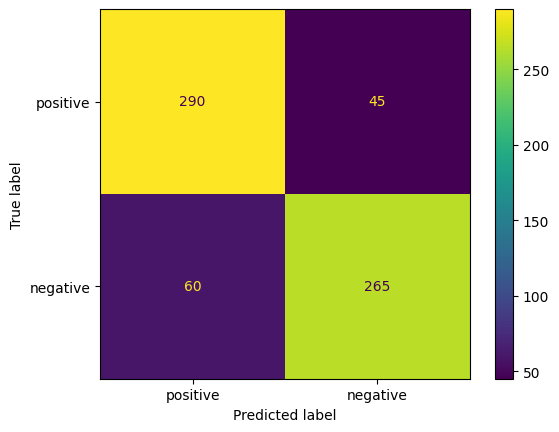

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
conf_mat = confusion_matrix (test_y, svc.predict(test_x_vector),labels=['positive','negative'])
print(conf_mat)

cmd=ConfusionMatrixDisplay(conf_mat, display_labels=['positive','negative']).plot()
